# Анализ первичных данных

### Получение данных

На первом этапе мы собрали данные на основе 23 368 объявлений ЦИАН о предложении аренды квартир в различных районах Москвы.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
path = '/Users/maricolada/Downloads/elbrus/rent_groupstreamlit/_data.csv'

df = pd.read_csv(path)
df

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


### Пропуски в составе данных

Для начала мы проанализировали, сколько суммарно пропусков в каждом столбце таблицы. Результаты представлены на графике ниже. В следующем релизе мы заполним пропущенные значения - в зависимости от результатов дальнейшего анализа и оценки того, (1) что подойдет для заполнения пропусков, (2) что не является существенным ценообразующим фактором.

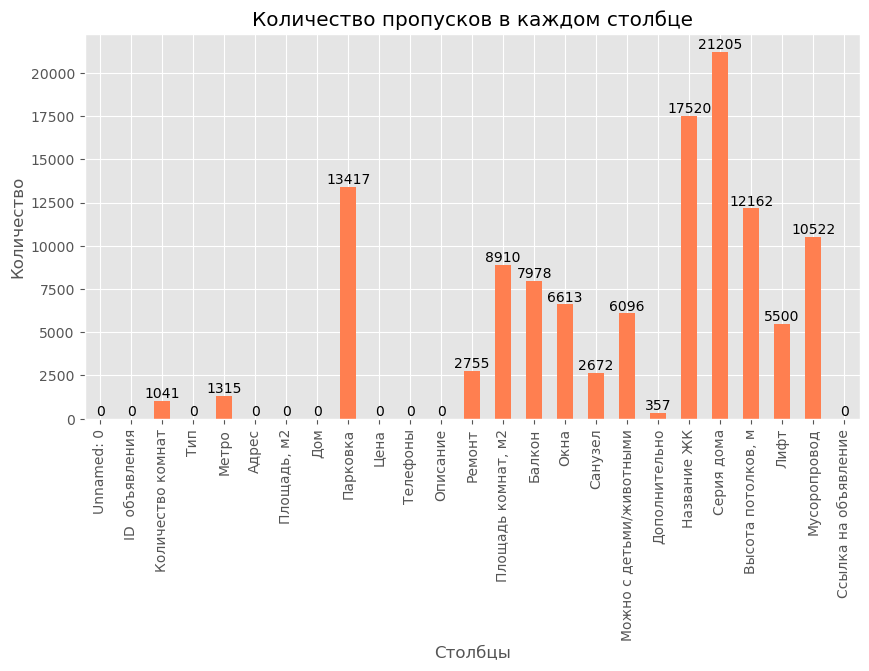

In [9]:
missing_df = df.isnull().sum()

plt.figure(figsize=(10, 5))
bars = missing_df.plot(kind='bar', color='coral')

for bar in bars.patches:
    #координаты для размещения текста
    yval = bar.get_height()  #высота столбца
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1,  #установка текста чуть выше столбца
             int(yval), ha='center', va='bottom')

plt.title('Количество пропусков в каждом столбце')
plt.xlabel('Столбцы')
plt.ylabel('Количество')
plt.style.use('ggplot')
plt.grid(True)
plt.show()

Если отдельно оценивать строки, то на подавляющее большинство квартир приходится от 3 до 7 пропусков в значениях. При этом значения отсутствуют в половине полей у меньшенства арендодателей.

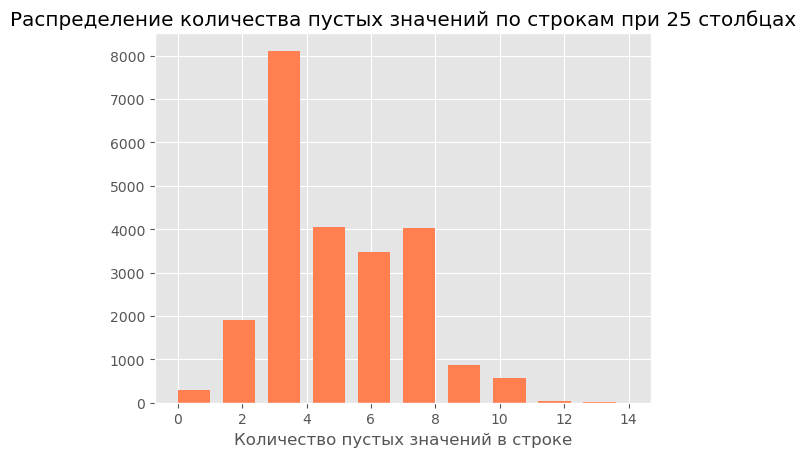

In [11]:
plt.style.use('ggplot')
plt.hist(df.isnull().sum(axis=1),
               width=1,
               color='coral')
plt.xticks(ha='center')
plt.xlabel('Количество пустых значений в строке')
plt.title('Распределение количества пустых значений по строкам при 25 столбцах')
plt.grid(True)
plt.show()

### Комментарии к пропущенным и заполненным значениям

Признаки, в которых отсутствуют пропуски, являются обязательными полями для заполнения на ЦИАН, поэтому нельзя сказать, что для самих арендаторов или арендодателей это важные факторы для формирования спроса и предложения. Поля, в которых есть пропуски, - опциональны для заполнения, поэтому пропуски есть даже в таких случаях, которые прямо влияют на формирование цены, - количество комнат и станция метро.

Признаки с наибольшим количеством пропусков - Название ЖК и Серия дома. Это говорит о том, что большая часть объектов находится в домах типовой массовой застройки, не имеющей авторского названия. При этом серия дома - это численно-буквенное обозначение. По ГОСТу эти обозначения образуют группы по типам, материалам, проектной долговечности зданий и др. Обычно серии относятся к домам советской застройки. Как правило, люди без специального образования не ориентируются в сериях домов или даже не знаю об их существовании. 

Можно сделать вывод, что указанные признаки не являются сильными факторами при выборе объекта аренды или для ценообразования.

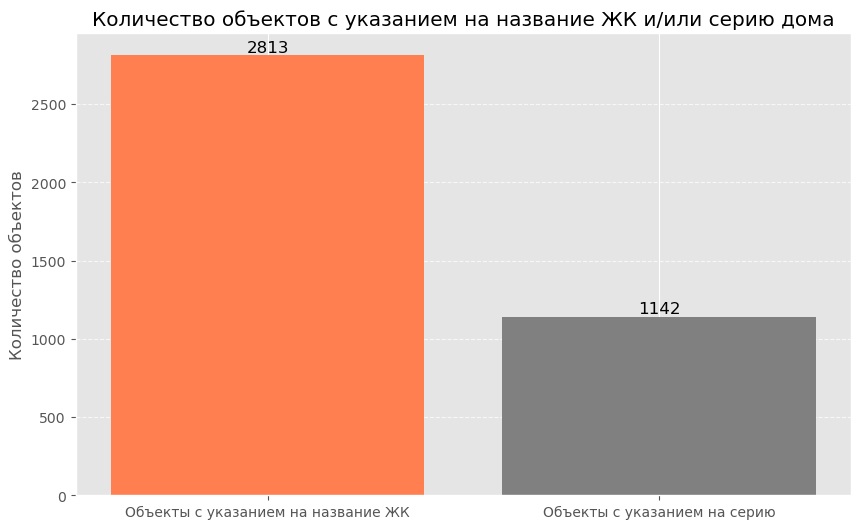

In [80]:
total_objects = 11684
missing_names = 8871 
missing_series = 10542

# Подсчет количества заполненных значений
filled_names = total_objects - missing_names
filled_series = total_objects - missing_series

labels = ['Объекты с указанием на название ЖК', 'Объекты с указанием на серию']
values = [filled_names, filled_series]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['coral', 'grey'])

plt.title('Количество объектов с указанием на название ЖК и/или серию дома')
plt.ylabel('Количество объектов')

for i in range(len(values)):
    plt.annotate(str(values[i]), 
                 xy=(i, values[i]), 
                 ha='center', 
                 va='bottom', 
                 fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.style.use('ggplot')
plt.show()

Следует обратить внимание, что есть два взаимосвязанных признака - это общая площадь сдаваемого объекта, которая на портале также позволяет заполнить данные по площадям комнат и кухни. Именно они указваются на второй и третьей позиции через слэш. Площадь комнат, в отличие от общей площади, - это  опциональный признак, которым пользуется около 62% арендодателей. Данные о площади множатся на количество указанных комнат и передаются в признаке Площадь комнат. Поскольку пользователи склонны заполнять обязательные поля необходимым минимумом - общей площадью, то данные о площади комнат в части объявлений отсутствуют.

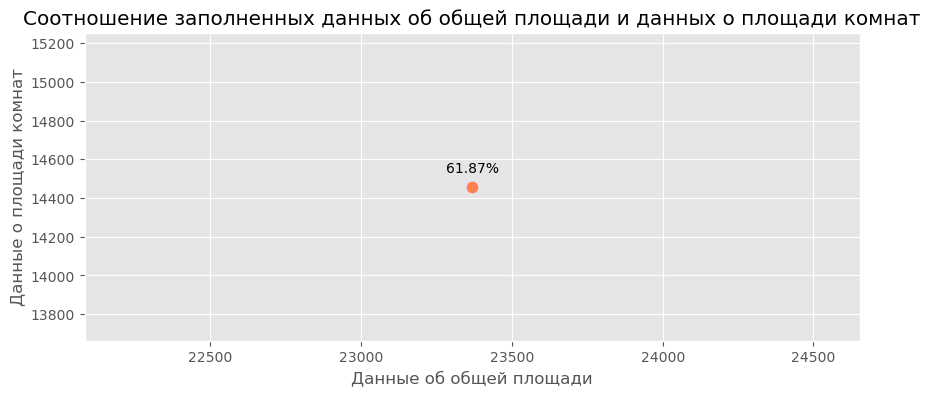

In [19]:
filled1 = df['Площадь, м2'].notna().sum()
filled2 = df['Площадь комнат, м2'].notna().sum()
missing = len(df) - filled2

percentage_filled1 = (filled2 / filled1 * 100) if missing > 0 else 0

x = [filled1]
y = [filled2]
sizes = [percentage_filled1 * 1]

plt.figure(figsize=(10, 4))
plt.scatter(x, y, color='coral', s=sizes)

plt.title('Соотношение заполненных данных об общей площади и данных о площади комнат')
plt.xlabel('Данные об общей площади')
plt.ylabel('Данные о площади комнат')

plt.annotate(f'{percentage_filled1:.2f}%', (x[0], y[0]), 
             textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()

По распределению предлагаемые квартиры в основном составляют до 100 кв.м общей площади, но есть и незначительные выбросы.

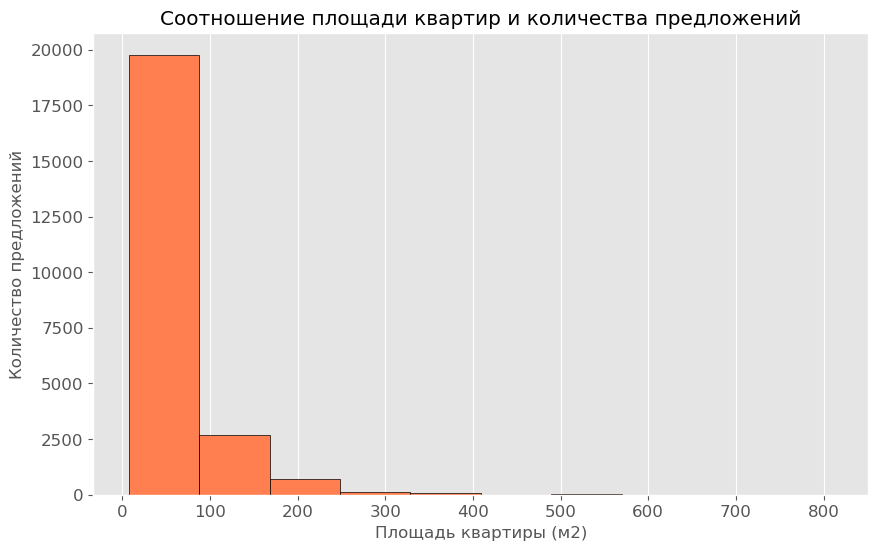

In [73]:
# убедимся, что названия в столбце строкового типа
df['Площадь, м2'] = df['Площадь, м2'].astype(str) 

# извлечение первого числа перед слешем из колонки "Площадь, м2"
df['Площадь, м2'] = df['Площадь, м2'].str.split('/').str[0].astype(float)

total_objects = 23368
offer_counts = [total_objects] * len(df)

plt.figure(figsize=(10, 6))
plt.hist(df['Площадь, м2'], bins=10, color='coral', edgecolor='black')

plt.style.use('ggplot')
plt.xlabel('Площадь квартиры (м2)')
plt.ylabel('Количество предложений')
plt.title('Соотношение площади квартир и количества предложений')

plt.grid(axis='y')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**Стоит дать небольшие комментарии с гипотезами по другим признакам со значительными пропусками.** 

1. **Парковка**. Большое количество пропусков связано с тем, что анкета ЦИАН не делает этот фактор обязательным, но не предоставляет опции "Отсутствует" или "Есть место во дворе" (которое формально не является парковкой). Исходя из этого, большая часть арендодателей пропускает это поле.
   
2. **Высота потолков**. Еще один признак, который, как и серия домов, зачастую - предмет строительной документации или плана квартиры, вне "поля зрения" обывателя. Чтобы не дезинформировать потенциальных арендаторов, предпочтителейней пропустить этот необязательный признак, чтобы разместить объявление.
   
3. **Мусоропровод**. Этот признак был особенно дискуссионным внутри нашей команды. Он также является опциональным для заполнения, хотя мусоропровод довольно трудно не заметить в своем доме. Мы предполагаем, что большое количество пропусков связано как с негативным отношением большинства жильцов/арендаторов к наличию мусоропровода в доме, так и с тем, что во многих домах мусоропроводы есть, но есть тренд - они заварены (законсервированы). В текущих реалиях это возможно сделать по согласованию с жильцами или до введения дома в эксплуатацию, если речь идет о новостройках. Получается, что фактически они есть, но не функционируют. 

В следующем релизе мы отфильтурем данные в таблице для удобства анализа, а также исключим признаки, которые не имеют существенного значения для ценообразования, и/или большое количество пропусков нельзя восполнить средними или медианными показателями, сохраняя объективность. 